In [247]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [210]:
from google.colab import files
uploaded=files.upload()

Saving glass (1).csv to glass (1) (2).csv


In [211]:
data=pd.read_csv("glass (1).csv")

In [212]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [213]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [214]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [215]:
data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [216]:
data.duplicated().sum()   #shows 1 duplicate

1

In [217]:
data=data.drop_duplicates(data)   #we are dropping the duplicate value

In [218]:
data.duplicated().sum()

0

In [219]:
array=data.values
X = array[:,0:9]
Y = array[:,9]

In [220]:
Y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 6., 6., 6., 6., 6., 6., 6., 6., 6., 7., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7.])

In [221]:
#build model
model=KNeighborsClassifier(n_neighbors=5)
results=cross_val_score(model,X,Y,cv=10)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


In [222]:
print(results.mean())    #accuracy of our model for data 62%

0.6292207792207792


In [223]:
data.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


<Axes: >

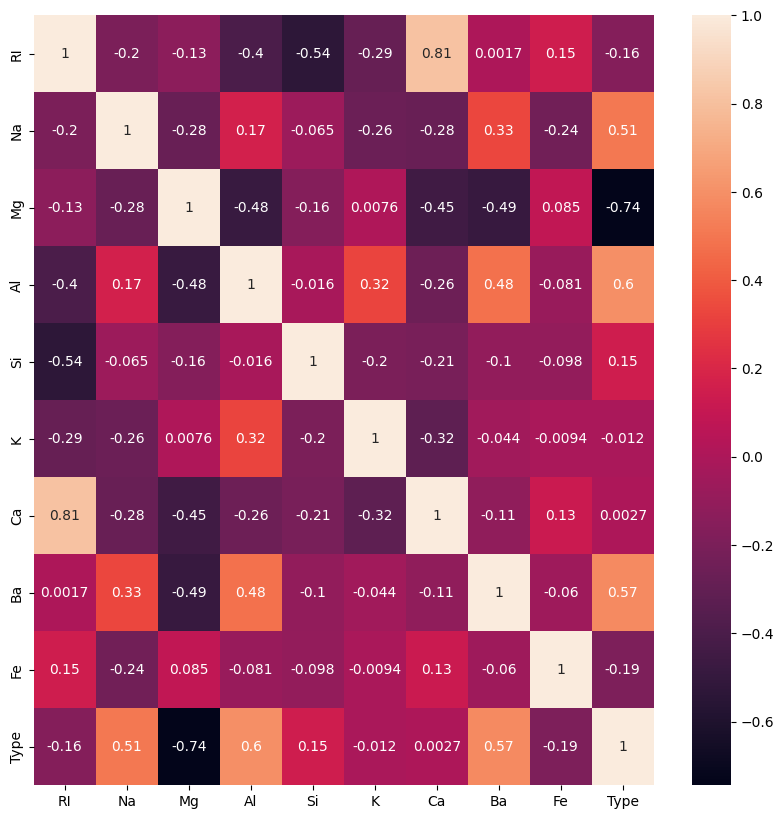

In [224]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True)
# ca and k are very less, i.e, Type is not dependent on them, we can remove those when we build our model

In [225]:
data=data.drop(['Ca', 'K'], axis=1)

In [226]:
#let us scale our data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data)


In [227]:
X_scaled=scaled_data[:,0:7]
X_scaled

array([[ 0.87984017,  0.28955813,  1.25723832, ..., -1.13324789,
        -0.35380764, -0.58830108],
       [-0.24381562,  0.59640332,  0.63931074, ...,  0.09703652,
        -0.35380764, -0.58830108],
       [-0.71641202,  0.15454625,  0.6045957 , ...,  0.43374593,
        -0.35380764, -0.58830108],
       ...,
       [ 0.76086485,  1.17327228, -1.86017161, ...,  0.99061151,
         2.94550057, -0.58830108],
       [-0.60735132,  1.19781989, -1.86017161, ...,  1.23666839,
         2.80467644, -0.58830108],
       [-0.40905912,  1.01371278, -1.86017161, ...,  0.91290934,
         3.00585377, -0.58830108]])

In [228]:
model_scaled=KNeighborsClassifier(n_neighbors=5)
results_scaled=cross_val_score(model,X_scaled,Y,cv=10)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


In [229]:
print(results_scaled.mean()) #accuracy of our model with the scaled data 0.66

0.6621212121212121


GridSearch algorithm tuning

In [230]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [231]:
n_neighbors=np.array(range(1,40))

In [232]:
param_grid=dict(n_neighbors=n_neighbors)

In [233]:
model_=KNeighborsClassifier()
grid=GridSearchCV(estimator=model_, param_grid=param_grid)
grid.fit(X_scaled,Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [234]:
print(grid.best_score_)
print(grid.best_params_)  #we got the best score as 0.68 and best parameters as n_neighbors '3'

0.6808416389811739
{'n_neighbors': 3}


#We will build the model again with this.

In [236]:
clf=KNeighborsClassifier(n_neighbors=1)
final_results=cross_val_score(clf,X_scaled,Y,cv=10)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


In [237]:
print(final_results.mean())   #we got the model accuracy of 68%

0.6331168831168832


In [238]:
#Let us split the data and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X_scaled,Y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((149, 7), (64, 7), (149,), (64,))

In [239]:
clf.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=1)

In [240]:
train_pred=clf.predict(X_train)
test_pred=clf.predict(X_test)

In [241]:
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
confusion_matrix(Y_train, train_pred)

array([[51,  0,  0,  0,  0,  0],
       [ 0, 52,  0,  0,  0,  0],
       [ 0,  0, 13,  0,  0,  0],
       [ 0,  0,  0,  9,  0,  0],
       [ 0,  0,  0,  0,  6,  0],
       [ 0,  0,  0,  0,  0, 18]])

In [242]:
print(classification_report(Y_train, train_pred))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        51
         2.0       1.00      1.00      1.00        52
         3.0       1.00      1.00      1.00        13
         5.0       1.00      1.00      1.00         9
         6.0       1.00      1.00      1.00         6
         7.0       1.00      1.00      1.00        18

    accuracy                           1.00       149
   macro avg       1.00      1.00      1.00       149
weighted avg       1.00      1.00      1.00       149



In [243]:
accuracy_score(Y_train, train_pred)

1.0

In [244]:
#the accuracy for our training data is 100%

In [245]:
confusion_matrix(Y_test, test_pred)

array([[14,  2,  2,  0,  0,  0],
       [ 6, 16,  1,  1,  0,  0],
       [ 1,  2,  1,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  2],
       [ 0,  1,  0,  0,  2,  0],
       [ 0,  0,  0,  1,  0, 10]])

In [246]:
accuracy_score(Y_test, test_pred)

0.703125

In [248]:
#accuracy of our training data gives 100%
#accuracy for testing data gives 70%
#after scaling our data, the accuracy increased by 4%


2.Implement a KNN model to classify the animals in to categorie

In [249]:
from google.colab import files
uploaded=files.upload()

Saving Zoo (1).csv to Zoo (1).csv


In [250]:
zoo=pd.read_csv("Zoo (1).csv")

In [251]:
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [252]:
zoo.type.value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

<ipython-input-254-7bbcfc680887>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(zoo.corr(), annot=True)


<Axes: >

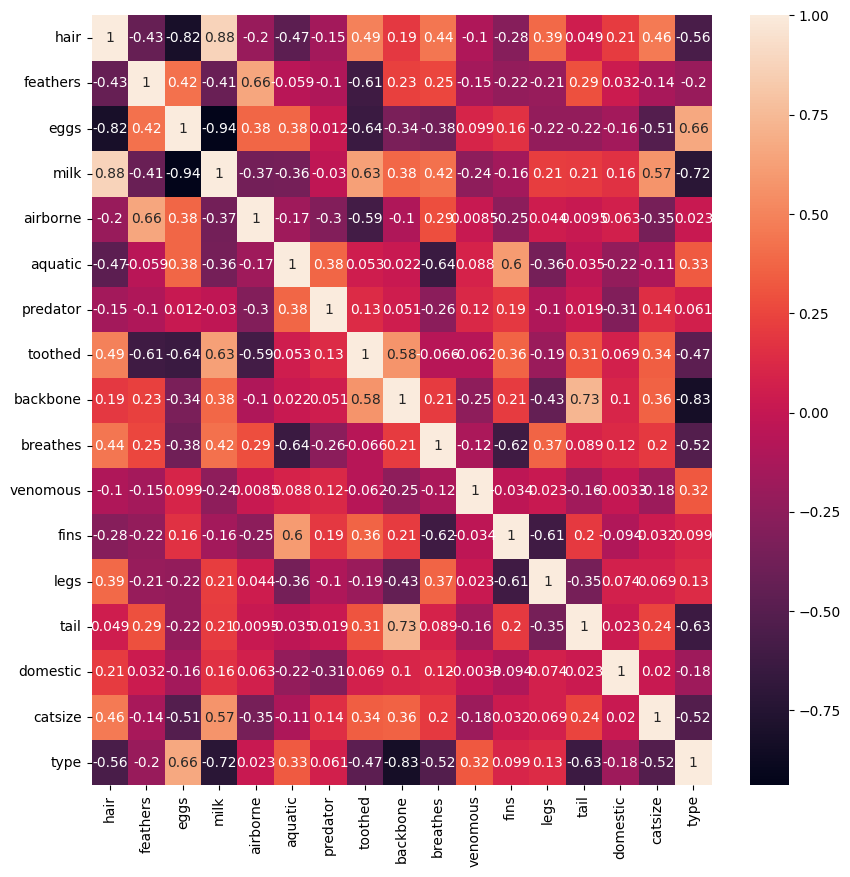

In [254]:
plt.figure(figsize=(10,10))
sns.heatmap(zoo.corr(), annot=True)

In [256]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [257]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [258]:
zoo.drop("animal name",axis=1,inplace=True)

In [297]:
zoo

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


KNN

In [299]:
from sklearn.model_selection import train_test_split
X = zoo.iloc[:,0:16]
Y = zoo.iloc[:,16]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1, stratify=Y)

In [300]:
model_zoo = KNeighborsClassifier(n_neighbors=3)
model_zoo.fit(X_train,Y_train)
results=cross_val_score(model_zoo,X,Y,cv=10)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


In [301]:
print(results.mean()) ###accuracy

0.95


In [302]:
#prediction on train data
preds_t= model_zoo.predict(X_train)
confusion_matrix(Y_train, preds_t)

array([[28,  0,  0,  0,  0,  0,  0],
       [ 0, 14,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  1,  1,  0,  0],
       [ 0,  0,  0,  9,  0,  0,  0],
       [ 0,  0,  0,  0,  3,  0,  0],
       [ 0,  0,  0,  0,  0,  6,  0],
       [ 0,  0,  0,  0,  0,  1,  6]])

In [303]:
#Predicting on test data
preds = model_zoo.predict(X_test) # predicting on test data set
confusion_matrix(Y_test, preds)

array([[13,  0,  0,  0,  0,  0,  0],
       [ 0,  6,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0,  0],
       [ 0,  0,  0,  4,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  1,  2]])

In [304]:
print("Accuracy for test data:",   accuracy_score(Y_test, preds), '               Accuracy for train data: ',  accuracy_score(Y_train, preds_t))   #test data

Accuracy for test data: 0.9032258064516129                Accuracy for train data:  0.9571428571428572


GridSearch algorith tuning

In [305]:
n_neighbors=np.array(range(1,40))
param_grid=dict(n_neighbors=n_neighbors)

In [306]:
model_zoo1=KNeighborsClassifier()
grid=GridSearchCV(estimator=model_zoo1, param_grid=param_grid)
grid.fit(X,Y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [307]:
print(grid.best_score_)
print(grid.best_params_)

0.97
{'n_neighbors': 1}


Let us build our model with n_neighbors=1

In [308]:
model_zoo2 = KNeighborsClassifier(n_neighbors=1)
results1=cross_val_score(model,X,Y,cv=10)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


In [309]:
print(results1.mean()) ###accuracy

0.8809090909090909


In [310]:
#Predict for train and test data
preds_t1= model_zoo.predict(X_train)
confusion_matrix(Y_train, preds_t1)

array([[28,  0,  0,  0,  0,  0,  0],
       [ 0, 14,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  1,  1,  0,  0],
       [ 0,  0,  0,  9,  0,  0,  0],
       [ 0,  0,  0,  0,  3,  0,  0],
       [ 0,  0,  0,  0,  0,  6,  0],
       [ 0,  0,  0,  0,  0,  1,  6]])

In [311]:
#Predicting on test data
preds1 = model_zoo.predict(X_test) # predicting on test data set
confusion_matrix(Y_test, preds1)

array([[13,  0,  0,  0,  0,  0,  0],
       [ 0,  6,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0,  0],
       [ 0,  0,  0,  4,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  1,  2]])

In [312]:
print("Accuracy for test data:",   accuracy_score(Y_test, preds1), '               Accuracy for train data: ',  accuracy_score(Y_train, preds_t1))

Accuracy for test data: 0.9032258064516129                Accuracy for train data:  0.9571428571428572
